In [1]:
## Final Project ##

In [17]:
#For the 'Median Value of owner occupied homes'provide a boxplot

In [75]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [76]:
from sklearn.datasets import load_boston

In [77]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["MEDV"] = boston.target

In [78]:
df.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  

In [79]:
df["MEDV"].mean(), df["MEDV"].median(), df["AGE"].mean()

(22.532806324110698, 21.2, 68.57490118577078)

In [80]:
df['RM'].mean()

6.284634387351787

In [81]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [82]:
df = df.rename(columns={
    "CRIM": "Crime_Rate",
    "ZN": "Residential_Land",
    "INDUS": "Non_Retail_Business",
    "CHAS": "Charles_River",
    "NOX": "Nitric_Oxides",
    "RM": "Avg_Rooms",
    "AGE": "AGE",
    "DIS": "Employment_Distance",
    "RAD": "Highway_Access_Index",
    "TAX": "Property_Tax_Rate",
    "PTRATIO": "Pupil_Teacher_Ratio",
    "LSTAT": "Lower_Status_Pct",
    "MEDV": "Median_Home_Value"
})

In [83]:
df.corr()

,Crime_Rate,Residential_Land,Non_Retail_Business,Charles_River,Nitric_Oxides,Avg_Rooms,AGE,Employment_Distance,Highway_Access_Index,Property_Tax_Rate,Pupil_Teacher_Ratio,B,Lower_Status_Pct,Median_Home_Value
Crime_Rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
Residential_Land,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
Non_Retail_Business,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
Charles_River,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
Nitric_Oxides,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
Avg_Rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
Employment_Distance,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
Highway_Access_Index,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
Property_Tax_Rate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [84]:
df.head()

,Crime_Rate,Residential_Land,Non_Retail_Business,Charles_River,Nitric_Oxides,Avg_Rooms,AGE,Employment_Distance,Highway_Access_Index,Property_Tax_Rate,Pupil_Teacher_Ratio,B,Lower_Status_Pct,Median_Home_Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


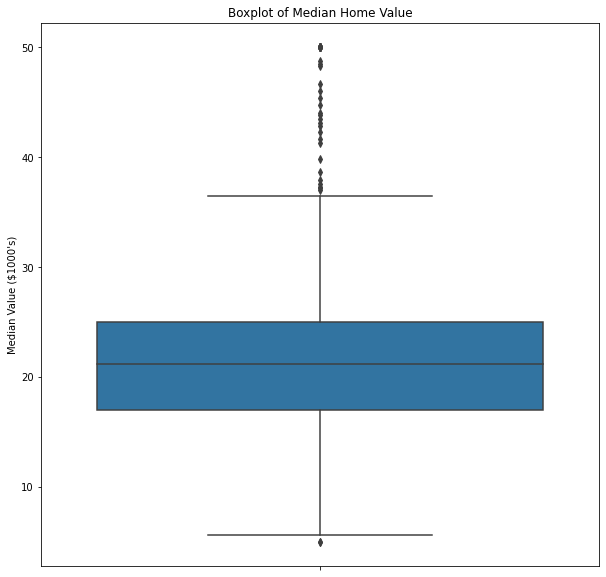

In [85]:
'''
Task 2 
 
For the Median value of owner-occupied homes provide a boxplot'''

plt.figure(figsize=(10,10))
sns.boxplot(y='Median_Home_Value', data=df)
plt.title('Boxplot of Median Home Value')
plt.ylabel("Median Value ($1000's)")
plt.show()

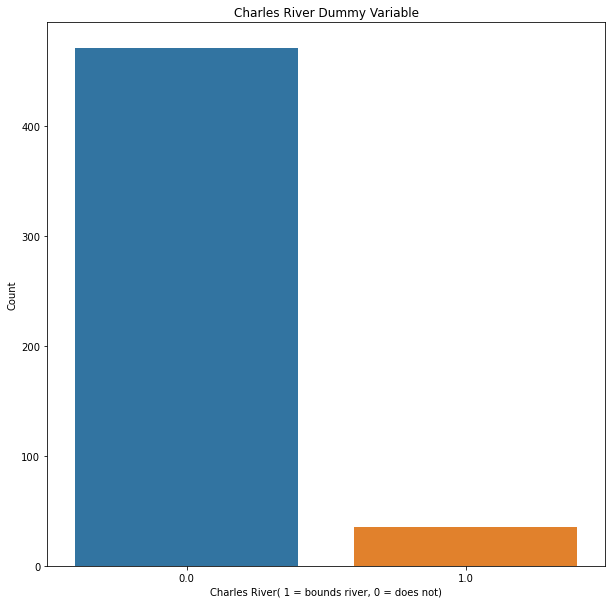

In [86]:
'''Task 2 

Provide a  bar plot for the Charles river variable'''

plt.figure(figsize=(10,10))
sns.countplot(x='Charles_River',data=df)
plt.title('Charles River Dummy Variable')
plt.xlabel('Charles River( 1 = bounds river, 0 = does not)')
plt.ylabel('Count')

plt.show()

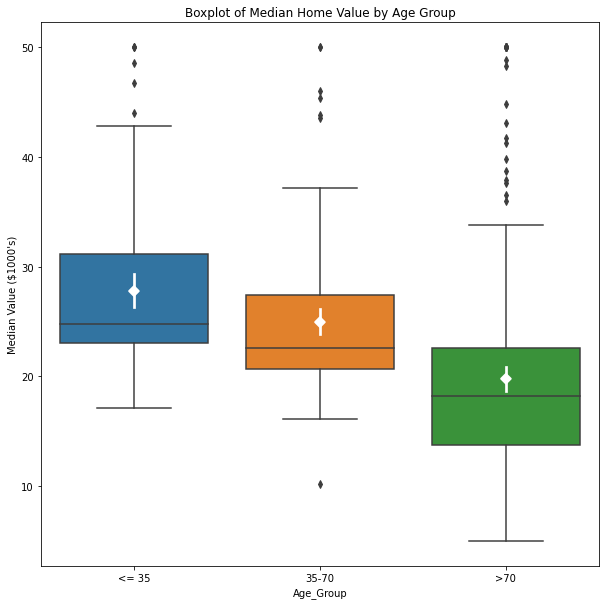

In [87]:
# 

#Task 2 

#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

#Create Age Groups

bins = [0,35,70,100]
labels = ["<= 35", "35-70", ">70"]
df["Age_Group"] = pd.cut(df["AGE"], bins=bins, labels=labels)

#Boxplot


plt.figure(figsize=(10,10))
sns.boxplot(x="Age_Group", y="Median_Home_Value", data=df)
sns.pointplot(x="Age_Group", y="Median_Home_Value", data=df,
    estimator=np.mean, color="white", markers="D", linestyles="")
plt.title("Boxplot of Median Home Value by Age Group")
plt.xlabel("Age_Group")
plt.ylabel("Median Value ($1000's)")
plt.show()


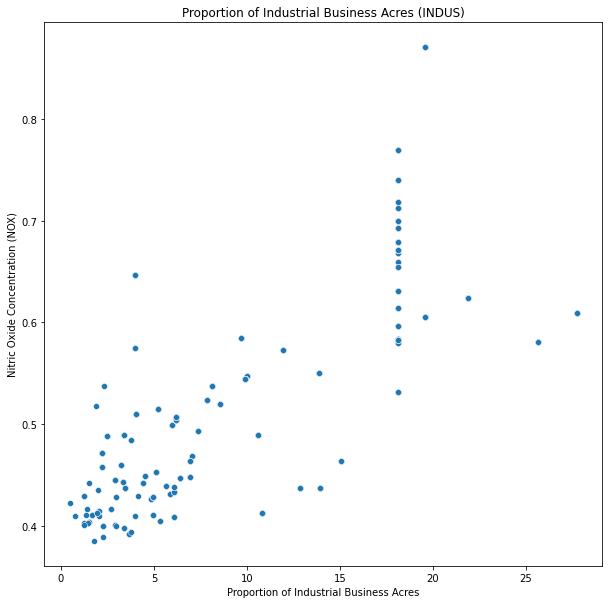

In [88]:
#Task 2 

#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

plt.figure(figsize=(10,10))
sns.scatterplot(x="Non_Retail_Business", y="Nitric_Oxides", data=df)
plt.title("Proportion of Industrial Business Acres (INDUS)")
plt.xlabel('Proportion of Industrial Business Acres')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.show()

Conclusion : The higher the Industrial type of business is strongly associated with the Nitrus Oxide Concentration, meaning, that there is a clear and strong relationship between NOX accumulation and the type of industry.

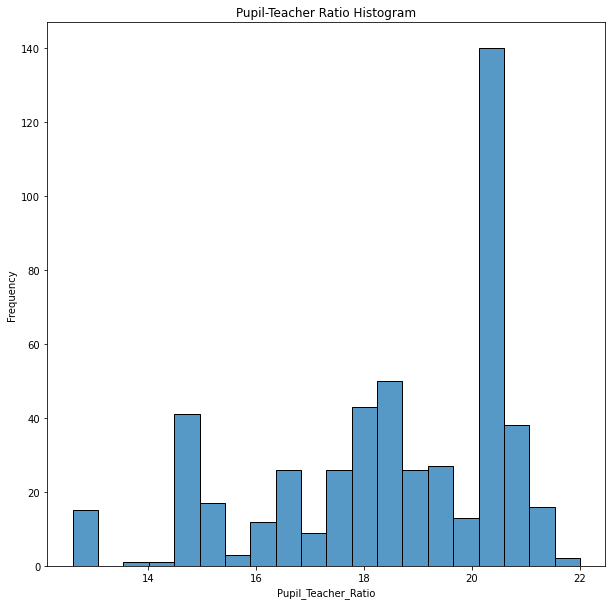

In [89]:
#Task 2

#Create a histogram for the pupil to teacher ratio variable

plt.figure(figsize=(10,10))
sns.histplot(df['Pupil_Teacher_Ratio'], bins=20, kde=False)
plt.title("Pupil-Teacher Ratio Histogram")
plt.xlabel('Pupil_Teacher_Ratio')
plt.ylabel('Frequency')
plt.show()

In [91]:
#Task 3 


#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
'''
Hypotheses (H0, H1)

Test statistic in Python

p-value vs α = 0.05 decision rule

Conclusion

'''

# Hypotheses

medv_charless0 = df[df["Charles_River"]==0]["Median_Home_Value"]
medv_charless1 = df[df["Charles_River"]==1]["Median_Home_Value"]

# independent t-test (Welch’s, unequal variances)

t_stat, p_val = stats.ttest_ind(medv_charless0, medv_charless1, equal_var=False)

print("T-statistic:", t_stat)
print("p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject H0 → Significant difference in Median House Value between Charles River groups.")
else:
    print("Fail to reject H0 → No significant difference.")

T-statistic: -3.113291312794837
p-value: 0.003567170098137517
Reject H0 → Significant difference in Median House Value between Charles River groups.


Conclusion : There is Statistically Significant Difference on the Median House Value, depending on if they are near the Charles River, the closer they are to it, the higher the Median values.

In [93]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

bins = [0,35,70,100]
labels = ["<=35","35-70",">70"]
df["Age_Group"] = pd.cut(df["AGE"], bins=bins, labels=labels)

# create age groups
g1 = df[df["Age_Group"]=="<=35"]["Median_Home_Value"]
g2 = df[df["Age_Group"]=="35-70"]["Median_Home_Value"]
g3 = df[df["Age_Group"]==">70"]["Median_Home_Value"]

# ANOVA
f_stat, p_val = stats.f_oneway(g1, g2, g3)

print("F-statistic:", f_stat)
print("p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject H0 → Significant difference in MEDV across AGE groups.")
else:
    print("Fail to reject H0 → No significant difference.")




F-statistic: 36.40764999196599
p-value: 1.7105011022702984e-15
Reject H0 → Significant difference in MEDV across AGE groups.


Conclusion: The statistic test shows that there are significant difference in median home values depending on the age bucket, it makes sense that newer homes will cost more than aged homes.

In [94]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(df["Median_Home_Value"], df["Age_Group"], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 35-70   <=35   2.8282 0.0447   0.0519  5.6044   True
 35-70    >70  -5.1543  0.001  -7.3063 -3.0023   True
  <=35    >70  -7.9824  0.001 -10.4183 -5.5466   True
-----------------------------------------------------


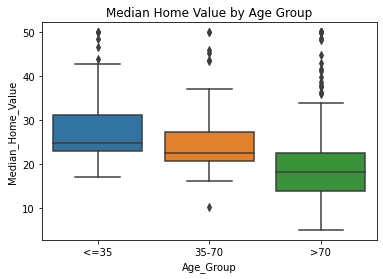

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="Age_Group", y="Median_Home_Value", data=df)
plt.title("Median Home Value by Age Group")
plt.show()

In [98]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

r, p_val = stats.pearsonr(df["Nitric_Oxides"], df["Non_Retail_Business"])

print("Correlation coefficient (r):", r)
print("p-value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject H0 → Significant correlation between Nitric Oxides and Non-Retail business.")
else:
    print("Fail to reject H0 → No significant correlation.")




Correlation coefficient (r): 0.7636514469209161
p-value: 7.913361061230596e-98
Reject H0 → Significant correlation between Nitric Oxides and Non-Retail business.


Conclusion : Given the result of the correlation Coefficient nearing 1, we can conclude that there is a strong relationship between the NOX and INDU variables. The more Industries in the area the more the concentration of air pollution.


In [104]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

'''Hypotheses:

H0: Beta = 0 → Distance (DIS) has no impact on MEDV.

H0: Beta != 0 → Distance (DIS) has an impact.

'''

import statsmodels.api as sm

X = sm.add_constant(df["Employment_Distance"])   # predictor
y = df["Median_Home_Value"]

model = sm.OLS(y, X).fit()
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:      Median_Home_Value   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 16 Sep 2025   Prob (F-statistic):           1.21e-08
Time:                        20:02:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  18.3901    

/Users/davidrico/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


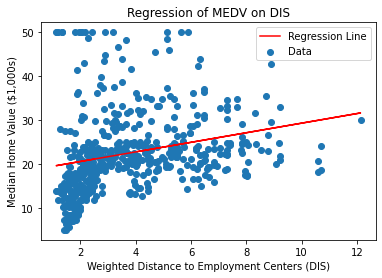

In [103]:
import matplotlib.pyplot as plt
plt.scatter(df["Employment_Distance"], df["Median_Home_Value"], label="Data")
plt.plot(df["Employment_Distance"], model.fittedvalues, color="red", label="Regression Line")
plt.xlabel("Weighted Distance to Employment Centers (DIS)")
plt.ylabel("Median Home Value ($1,000s)")
plt.title("Regression of MEDV on DIS")
plt.legend()
plt.show()

Conclusion: An additional weighted distance to the Boston employment Centers increases the median value of owner-occupied homes by approx 1,091 USD according to the regression test. However the model also only explains 6.2 percent of the variation in home values, so there will be a need to implement other more robust tests to be more certain of the results.
